## SURROGATE MODELLING FOR BINARY DISTILLATION

#### Binary Distillation
Binary distillation is a separation process used to separate a mixture of two components into two product streams (distillate and bottoms) based on their relative volatility. The lighter component concentrates in the distillate, while the heavier component concentrates in the bottoms.

#### Surrogate Modelling
Surrogate modeling is a method of using machine learning models to approximate the results of complex simulations(like DWSIM). In distillation, it replaces time-consuming rigorous simulations with a fast predictive model, making tasks like optimization, sensitivity analysis, and energy minimization much quicker.

## Exploratory Data Analysis 
### 1) Problem Statement

This project understands how the distillate purity (xD) and reboiler duty (QR) of a binary distillation column are affected by operating variables such as reflux ratio, boilup ratio, feed mole fraction, feed flowrate, number of stages, and feed thermal condition.

### 2) Data Collection
- Data was generated using the DWSIM process simulator for a binary ethanol–water system at 1 atm. 
- The data consists of 8 column and 373 rows.

### 2.1 Import Data and Recquired Packages

In [505]:
#Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [506]:
#Importing CSV data as Pandas dataframe
df = pd.read_csv('data/DWSIM.csv')

In [507]:
#Shows top 5 records
df.head()

,Reflux Ratio (R),Boilup Ratio (B),Feed Mole Fraction (xF),Feed Flowrate (F) kmol/hr,Number of Stages (N),Feed Thermal Condition (q),Distillate Mole Fraction (xD),Reboiler Duty (QR) (kW)
0,3.89,1.66,0.21,74.18,25,1,0.806,2742
1,4.54,1.36,0.67,80.39,25,1,0.853,2637
2,3.56,2.58,0.61,86.30,25,1,0.848,3062
3,4.43,1.69,0.81,71.26,25,0,0.884,2722
4,2.69,2.17,0.45,99.56,20,1,0.820,3231


In [508]:
#Shape of the dataset
df.shape

(373, 8)

### 2.2 Dataset Information

Data was generated using the DWSIM process simulator for a binary ethanol–water system at 1 atm.

- Reflux Ratio (R): The ratio of liquid returned to the column compared to liquid taken out as product.
- Boilup Ratio/ (B): The ratio of vapor generated in the reboiler compared to distillate flow.
- Feed Mole Fraction (xF): The mole fraction of the more volatile component present in the feed mixture entering the column.
- Feed Flow Rate (F): The total molar or mass flow rate of the feed stream supplied to the column
- Number of Stages (N): The number of theoretical plates or trays in the column where vapor–liquid contact occurs.
- Feed Thermal Conditions (q): The state of the feed when it enters the column (liquid, vapor, or partly both).
- Distillate Mole Fraction (xD): The mole fraction of more volatile component in the distillate product stream.
- Reboiler Duty (QR): The heat energy supplied to the reboiler to generate vapor.

### 3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
- Check for unit consistency

### 3.1 Check Missing Values

In [509]:
#checks for missing values
df.isna().sum()

Reflux Ratio (R)                 0
Boilup Ratio (B)                 0
Feed Mole Fraction (xF)          0
Feed Flowrate (F) kmol/hr        0
Number of Stages (N)             0
Feed Thermal Condition (q)       0
Distillate Mole Fraction (xD)    0
Reboiler Duty (QR) (kW)          0
dtype: int64

There are no missing values in the data set

### 3.2 Check for Duplicates

In [510]:
#Checks for duplicates
df.duplicated().sum()

np.int64(66)

There are 66 duplicate values in dataset.

In [511]:
#Deletes duplicates
df = df.drop_duplicates()

In [512]:
df.shape

(307, 8)

In [513]:
df.duplicated().sum()

np.int64(0)

Duplicate values are dropped.

### 3.3 Check Data Types

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 372
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Reflux Ratio (R)               307 non-null    float64
 1   Boilup Ratio (B)               307 non-null    float64
 2   Feed Mole Fraction (xF)        307 non-null    float64
 3   Feed Flowrate (F) kmol/hr      307 non-null    float64
 4   Number of Stages (N)           307 non-null    int64  
 5   Feed Thermal Condition (q)     307 non-null    int64  
 6   Distillate Mole Fraction (xD)  307 non-null    float64
 7   Reboiler Duty (QR) (kW)        307 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 21.6 KB


### 3.4 Check Unique Values

In [515]:
#checks for unique values in each column
df.nunique()

Reflux Ratio (R)                 133
Boilup Ratio (B)                  98
Feed Mole Fraction (xF)           95
Feed Flowrate (F) kmol/hr         98
Number of Stages (N)               3
Feed Thermal Condition (q)         2
Distillate Mole Fraction (xD)    100
Reboiler Duty (QR) (kW)           99
dtype: int64

### 3.5 Check Data Statistics

In [516]:
df.describe()

,Reflux Ratio (R),Boilup Ratio (B),Feed Mole Fraction (xF),Feed Flowrate (F) kmol/hr,Number of Stages (N),Feed Thermal Condition (q),Distillate Mole Fraction (xD),Reboiler Duty (QR) (kW)
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2.986326,1.994225,0.536351,104.335635,19.755700,0.495114,0.832303,3030.280130
std,0.983893,0.346864,0.141297,11.937622,3.983905,0.500792,0.036215,149.852236
min,1.053000,1.139000,0.210000,71.260000,15.000000,0.000000,0.735000,2549.000000
25%,2.050000,1.750000,0.445950,95.000000,15.000000,0.000000,0.805750,2938.000000
50%,3.000000,2.000000,0.550000,105.000000,20.000000,0.000000,0.840000,3052.000000
75%,3.800000,2.250000,0.631600,115.000000,25.000000,1.000000,0.860000,3150.000000
max,4.897000,2.837000,0.931000,134.650000,25.000000,1.000000,0.900000,3350.000000


### 3.6 Exploring Data

In [517]:
df.head()

,Reflux Ratio (R),Boilup Ratio (B),Feed Mole Fraction (xF),Feed Flowrate (F) kmol/hr,Number of Stages (N),Feed Thermal Condition (q),Distillate Mole Fraction (xD),Reboiler Duty (QR) (kW)
0,3.89,1.66,0.21,74.18,25,1,0.806,2742
1,4.54,1.36,0.67,80.39,25,1,0.853,2637
2,3.56,2.58,0.61,86.30,25,1,0.848,3062
3,4.43,1.69,0.81,71.26,25,0,0.884,2722
4,2.69,2.17,0.45,99.56,20,1,0.820,3231


In [518]:
# Numeric features (all except the one categorical feature)
numeric_features = [col for col in df.columns if col != 'Feed_ThermalCondition']
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')

# Categorical feature
categorical_features = ['Feed_ThermalCondition']
print(f'We have {len(categorical_features)} categorical feature: {categorical_features}')


We have 8 numerical features: ['Reflux Ratio (R)', 'Boilup Ratio (B)', 'Feed Mole Fraction (xF)', 'Feed Flowrate (F) kmol/hr', 'Number of Stages (N)', 'Feed Thermal Condition (q)', 'Distillate Mole Fraction (xD)', 'Reboiler Duty (QR) (kW)']
We have 1 categorical feature: ['Feed_ThermalCondition']


In [519]:
#Renaming columns for better accessibility
df.rename(columns={
    'Reflux Ratio (R)': 'RefluxRatio',
    'Boilup Ratio (B)': 'BoilupRatio',
    'Feed Mole Fraction (xF)': 'Feed_MoleFraction',
    'Feed Flowrate (F) kmol/hr': 'Feed_Flowrate',
    'Number of Stages (N)': 'Stages',
    'Feed Thermal Condition (q)': 'Feed_ThermalCondition',
    'Distillate Mole Fraction (xD)': 'Distillate_MoleFraction',
    'Reboiler Duty (QR) (kW)': 'ReboilerDuty'
}, inplace=True)


In [520]:
df.head()

,RefluxRatio,BoilupRatio,Feed_MoleFraction,Feed_Flowrate,Stages,Feed_ThermalCondition,Distillate_MoleFraction,ReboilerDuty
0,3.89,1.66,0.21,74.18,25,1,0.806,2742
1,4.54,1.36,0.67,80.39,25,1,0.853,2637
2,3.56,2.58,0.61,86.30,25,1,0.848,3062
3,4.43,1.69,0.81,71.26,25,0,0.884,2722
4,2.69,2.17,0.45,99.56,20,1,0.820,3231


### 4) Exploring Data ( Visualization )
### 4.1 UNIVARIATE ANALYSIS
#### 4.1.1 Histogram 

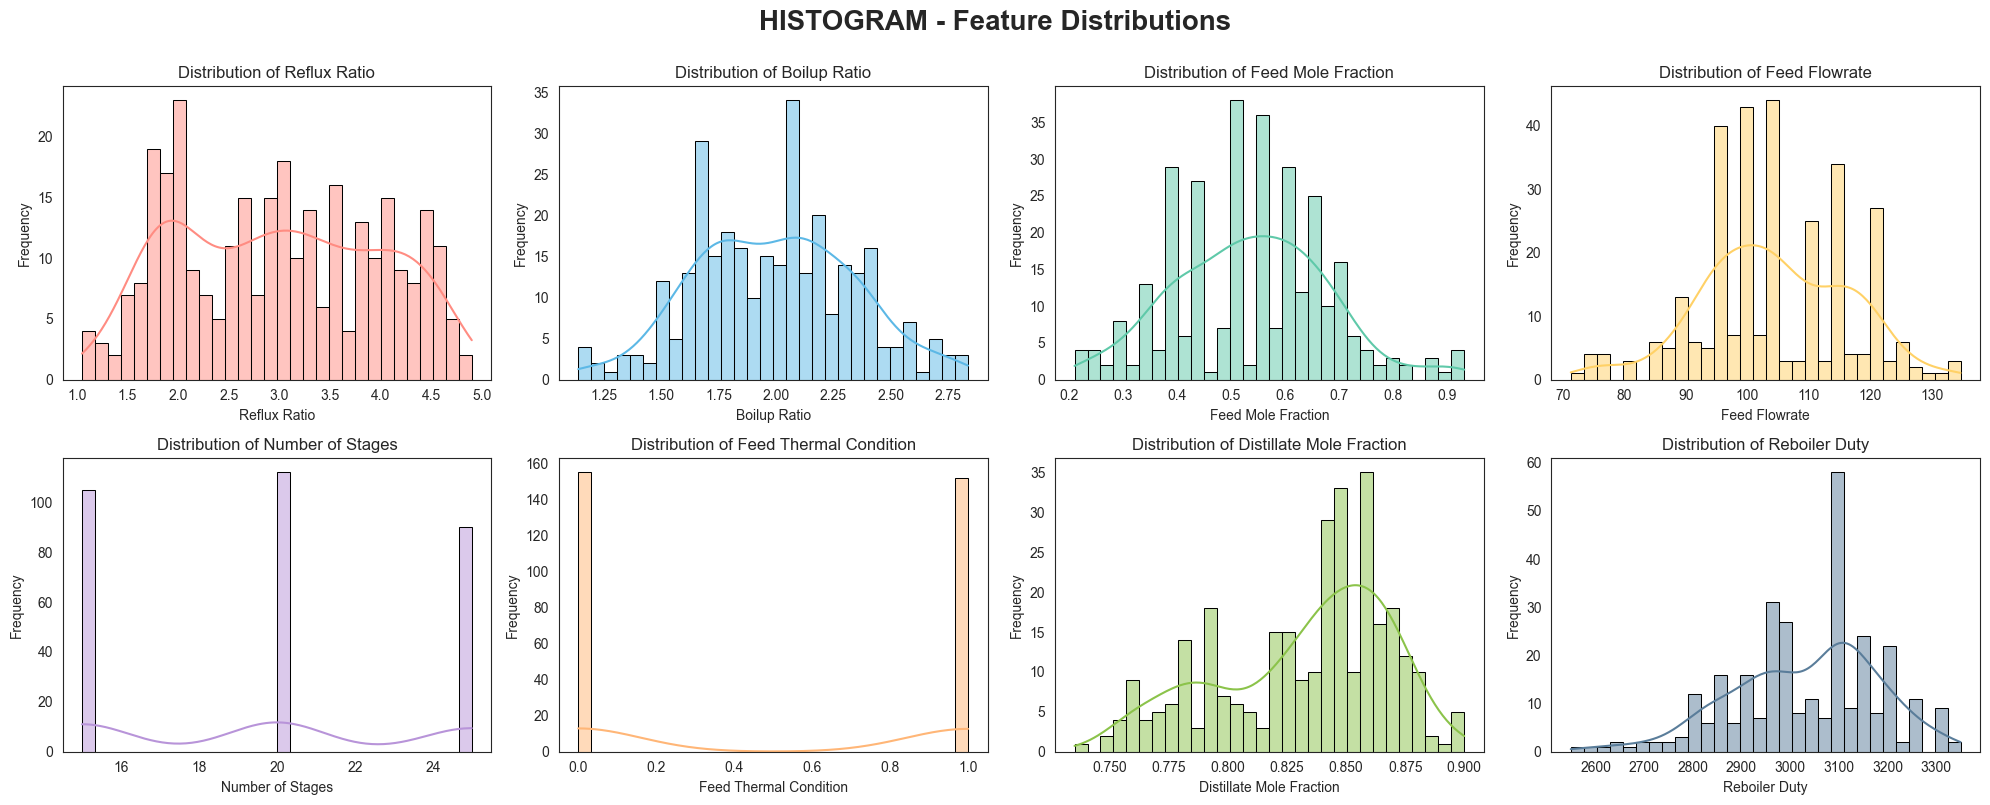

In [521]:
#Plotting Histograms for all features
sns.set_style("white")

columns = [
    ('RefluxRatio', '#FF8C82', 'Reflux Ratio'),
    ('BoilupRatio', '#5CB8E6', 'Boilup Ratio'),
    ('Feed_MoleFraction', '#5FC9A9', 'Feed Mole Fraction'),
    ('Feed_Flowrate', '#FFD166', 'Feed Flowrate'),
    ('Stages', '#B894D9', 'Number of Stages'),
    ('Feed_ThermalCondition', '#FFB677', 'Feed Thermal Condition'),
    ('Distillate_MoleFraction', '#8BC34A', 'Distillate Mole Fraction'),
    ('ReboilerDuty', '#5A7D9A', 'Reboiler Duty')
]

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle("HISTOGRAM - Feature Distributions", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.histplot(df[col], bins=30, color=color, kde=True, ax=ax, edgecolor='black')
    ax.set_xlabel(title, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.set_title(f"Distribution of {title}", fontsize=12)
plt.tight_layout()
plt.show()

INSIGHTS:
- Reflux Ratio shows no extreme skewness, but distribution is not perfectly normal, this indicates wide operating conditions are tested.
- Boilup Ratio is roughly bell-shaped (close to normal distribution).
- Feed Mole Fraction shows clear unimodal distribution (one peak), peaking near 0.5–0.6.
- Number of Stages is a highly discrete distribution (only 15, 20, 25 stages).
- Feed Thermal Condition contains binary values 0 and 1 only and is essentially categorical.
- Histogram shows that Number of Stages and Feed Thermal Condition can be taken as categorical features, but since the number of stages can vary in distillation, it is better to treat it as continuous feature.

#### 4.1.2 Boxplot

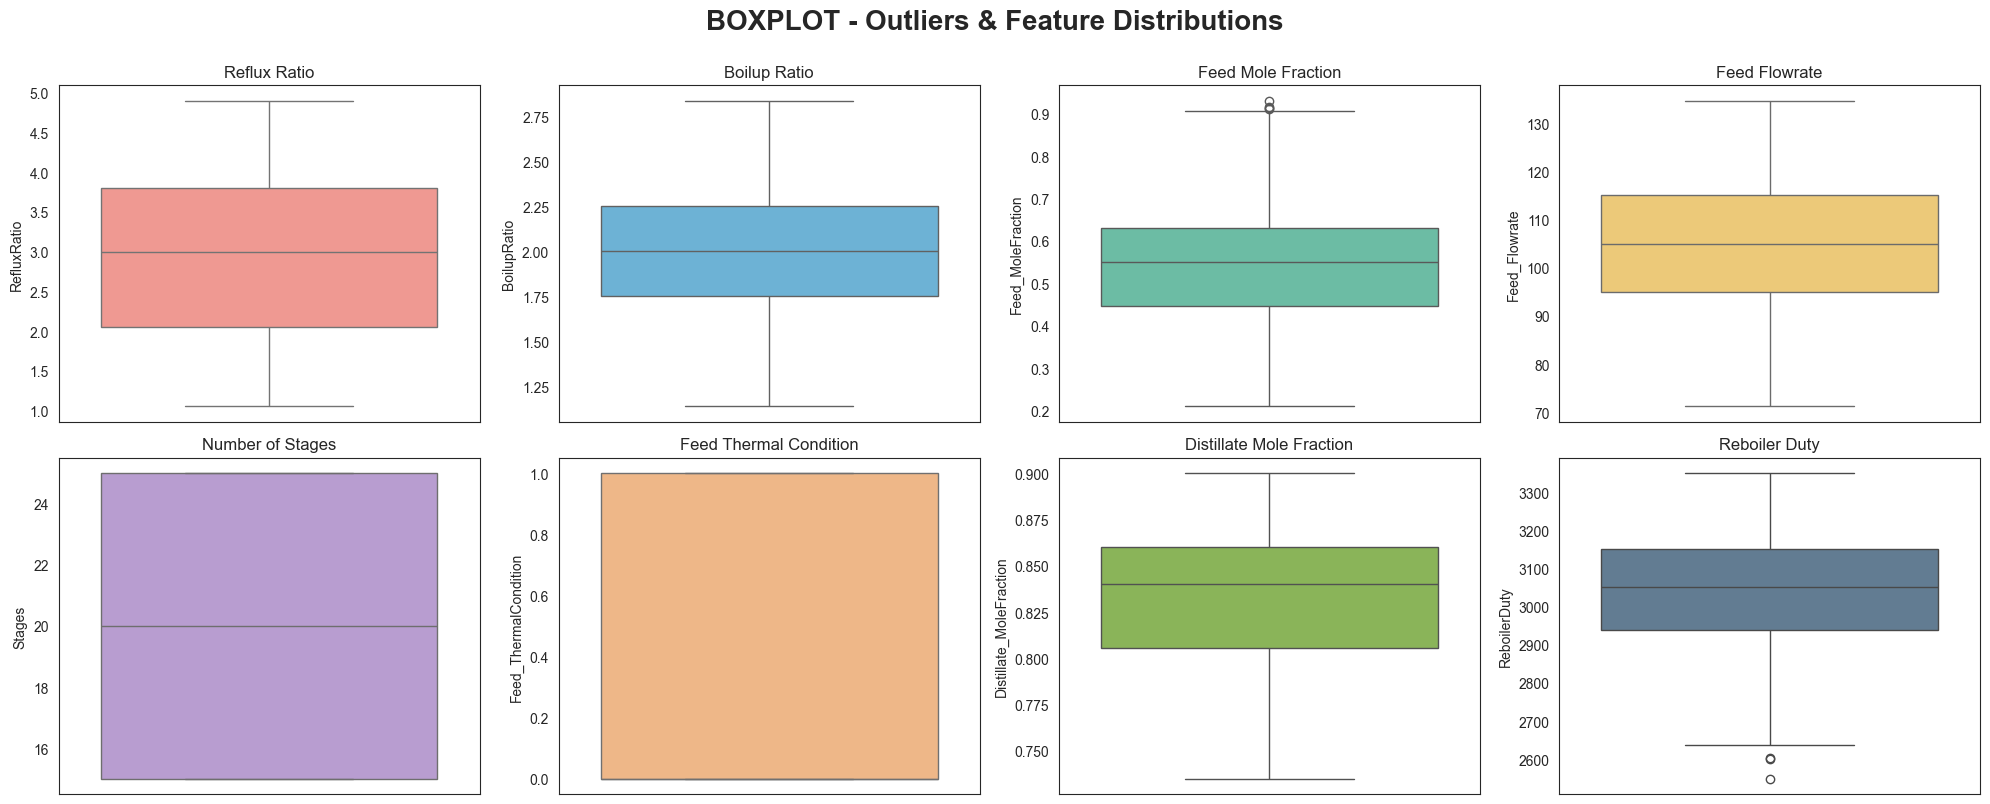

In [522]:
#Plotting Boxplot to detect outliers
sns.set_style("white")

columns = [
    ('RefluxRatio', '#FF8C82', 'Reflux Ratio'),
    ('BoilupRatio', '#5CB8E6', 'Boilup Ratio'),
    ('Feed_MoleFraction', '#5FC9A9', 'Feed Mole Fraction'),
    ('Feed_Flowrate', '#FFD166', 'Feed Flowrate'),
    ('Stages', '#B894D9', 'Number of Stages'),
    ('Feed_ThermalCondition', '#FFB677', 'Feed Thermal Condition'),
    ('Distillate_MoleFraction', '#8BC34A', 'Distillate Mole Fraction'),
    ('ReboilerDuty', '#5A7D9A', 'Reboiler Duty')
]

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle("BOXPLOT - Outliers & Feature Distributions", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.boxplot(df[col],color=color, ax=ax)
    ax.set_title(f"{title}", fontsize=12)
plt.tight_layout()
plt.show()



INSIGHTS:
- There are no severe outliers that need removal.
- Boxplots confirms that the dataset is balanced with wide coverage of operating conditions just as shown in the histogram.

### 4.2 BIVARIATE ANALYSIS
#### 4.2.1 Scatter Plot - Distillate Mole Fraction

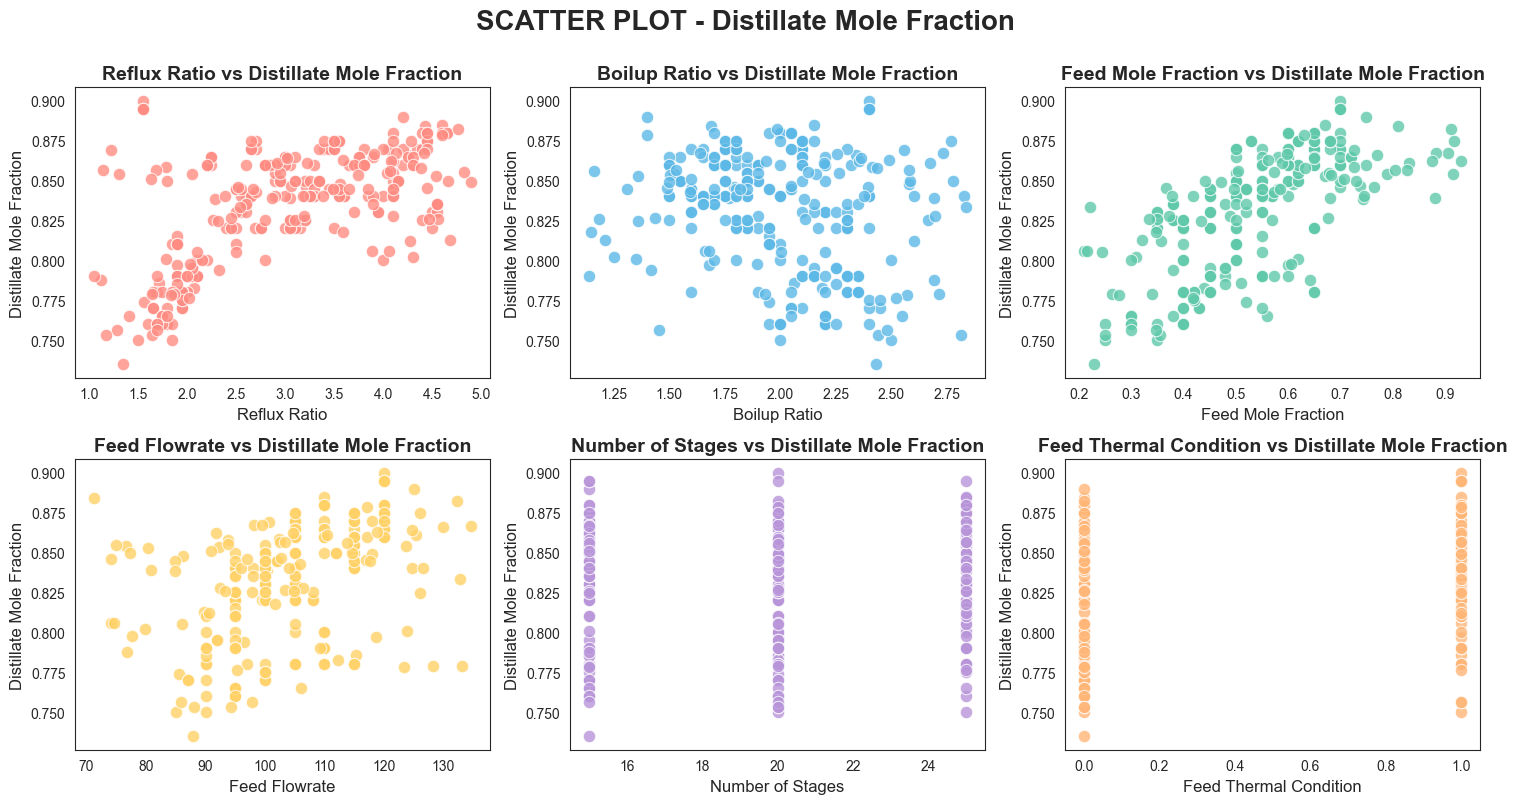

In [523]:
features = ['RefluxRatio','BoilupRatio','Feed_MoleFraction','Feed_Flowrate','Stages','Feed_ThermalCondition']
output = 'Distillate_MoleFraction'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("SCATTER PLOT - Distillate Mole Fraction", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col], y=df[output], ax=ax, color=color, edgecolors='w', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Distillate Mole Fraction', fontsize=12)
    ax.set_title(f'{title} vs Distillate Mole Fraction', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

INSIGHTS:
- Reflux Ratio vs Distillate Mole Fraction: 
Clear positive correlation, as reflux ratio increases, distillate mole fraction also increases. However, after around Reflux Ratio (3.5–4.0), the improvement in mole fraction seems to dip.

- Boilup Ratio vs Distillate Mole Fraction:
No strong visible trend. The points are spread out randomly.

- Feed Mole Fraction vs Distillate Mole Fraction:
Strong positive linear trend - higher feed mole fraction leads to higher distillate mole fraction.

- Feed Flowrate vs Distillate Mole Fraction
Slight positive relationship, however the spread is larger compared to reflux ratio or feed mole fraction.

- Number of Stages vs Distillate Mole Fraction
Within each stage count, mole fraction has variation, but overall more stages generally improve separation.

- Feed Thermal Condition vs Distillate Mole Fraction
Mole fraction is higher and more consistent when feed thermal condition is 1.

#### 4.2.2 Scatter Plot - Reboiler Duty

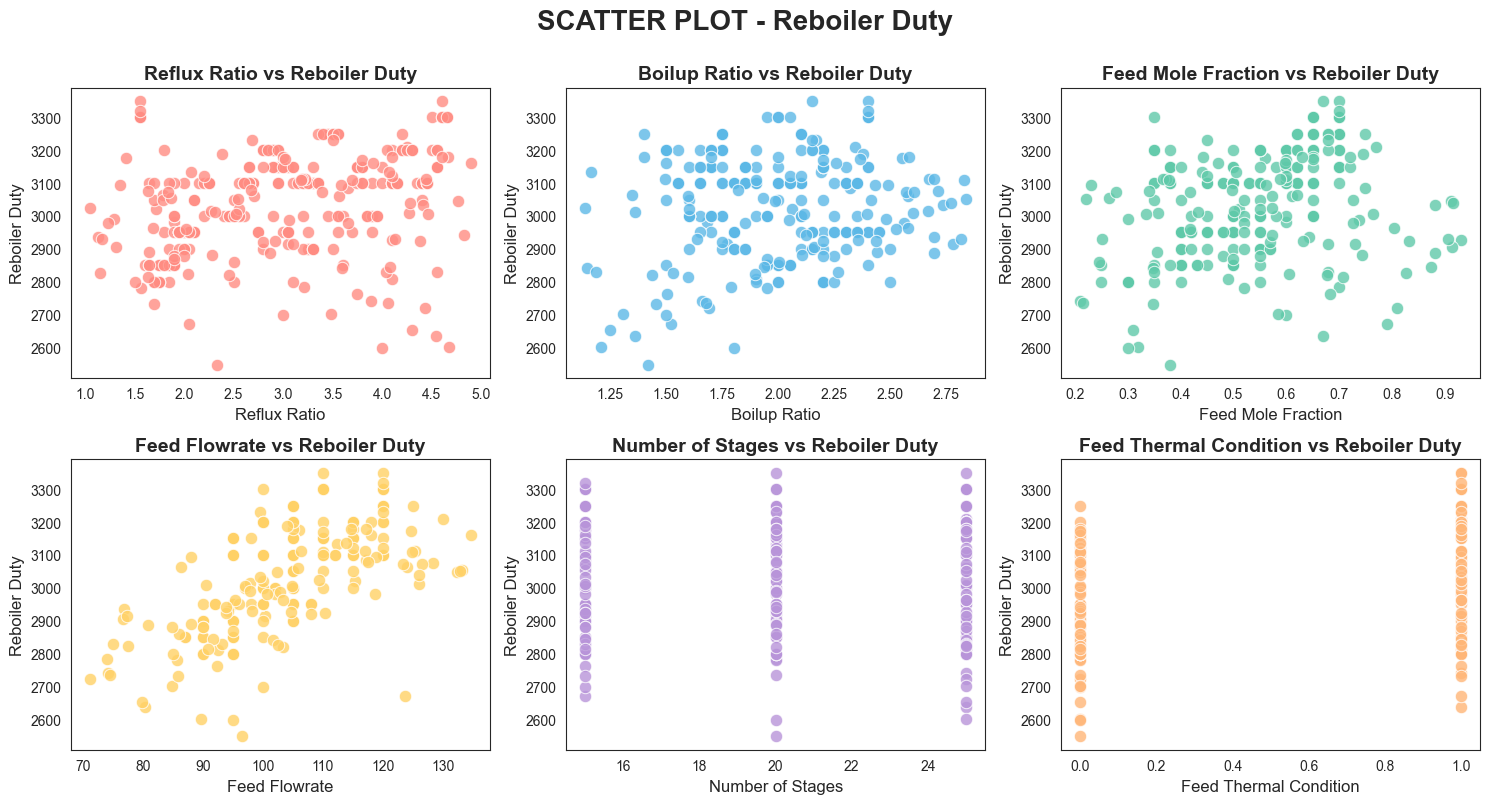

In [524]:
features = ['RefluxRatio','BoilupRatio','Feed_MoleFraction','Feed_Flowrate','Stages','Feed_ThermalCondition']
output = 'ReboilerDuty'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("SCATTER PLOT - Reboiler Duty", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col], y=df[output], ax=ax, color=color, edgecolors='w', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Reboiler Duty', fontsize=12)
    ax.set_title(f'{title} vs Reboiler Duty', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

INSIGHTS:
- Reflux Ratio vs Reboiler Duty:
No clear trend. Reboiler duty is spread across the reflux ratio range.

- Boilup Ratio vs Reboiler Duty:
Slight positive relationship, however the spread is scattered.

- Feed Mole Fraction vs Reboiler Duty:
No strong visible trend. The points are spread out randomly with a slight upward tendency.

- Feed Flowrate vs Reboiler Duty:
Clear positive correlation, as feed flowrate increases, reboiler duty also increases almost linearly.

- Number of Stages vs Reboiler Duty:
At higher stages, duty tends to be slightly higher (especially at 25 stages).

- Feed Thermal Condition vs Reboiler Duty:
Reboiler duty is higher when feed thermal condition is 1.

#### 4.2.3 Pairwise Relationship

Text(0.5, 1.02, 'PAIRPLOT - Feature Relationships')

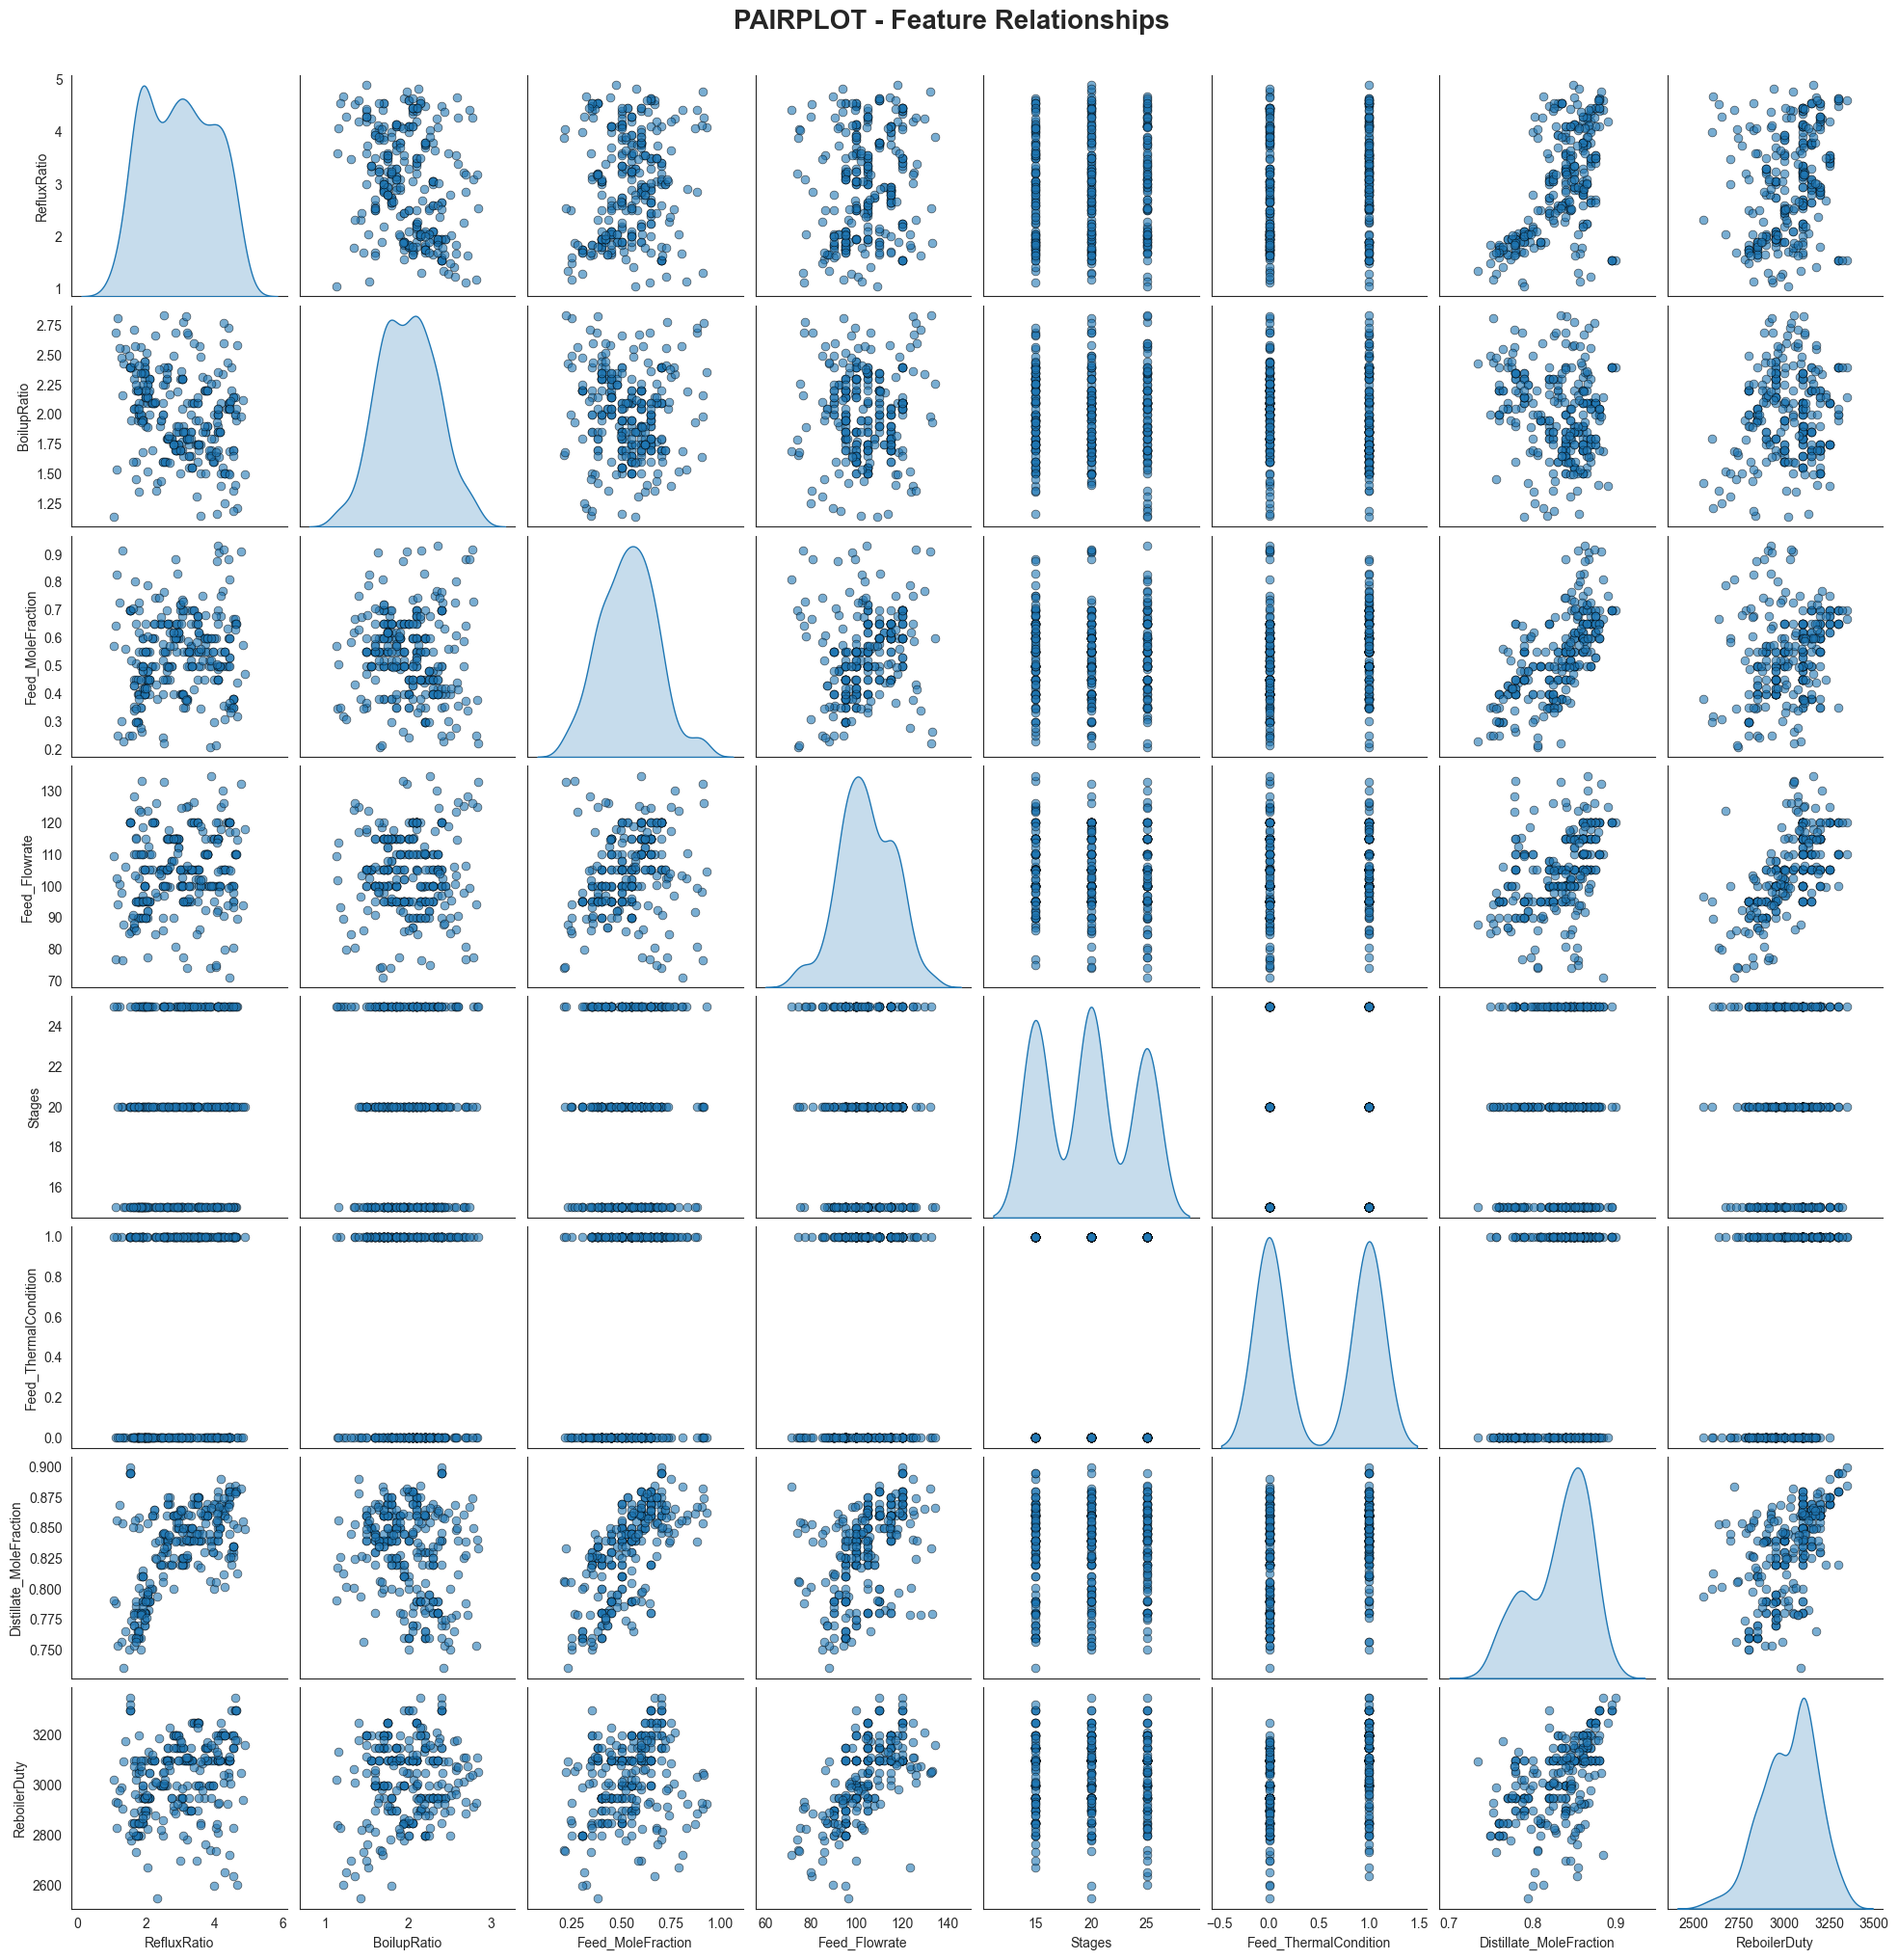

In [525]:
variables = [('RefluxRatio'), ('BoilupRatio'),('Feed_MoleFraction'), ('Feed_Flowrate'), ('Stages'), ('Feed_ThermalCondition'), ('Distillate_MoleFraction'), ('ReboilerDuty')]
sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("PAIRPLOT - Feature Relationships", fontsize=20, fontweight="bold",y=1.02)


INSIGHTS:
- Reflux Ratio:
Shows a clear positive relationship with Distillate Mole Fraction (matches earlier scatterplot insight).
No clear relationship with Reboiler Duty (points scattered).

- Boilup Ratio:
Weak or no strong relationship with Distillate Mole Fraction or Reboiler Duty.

- Feed Mole Fraction:
Strong positive correlation with Distillate Mole Fraction (clear upward trend).
Very weak relation with Reboiler Duty.

- Feed Flowrate:
Slight positive relation with Distillate Mole Fraction but weaker.
Positive correlation with Reboiler Duty (linear trend).

- Number of Stages:
Discrete clusters (15, 20, 25).
More stages give slightly higher Distillate Mole Fraction (better separation).
More stages give slightly higher Reboiler Duty (more energy demand).

- Feed Thermal Condition:
Distillate Mole Fraction is higher & more consistent when FeedThermalCondition = 1.
Reboiler Duty also shifts upwards when FeedThermalCondition = 1.

### 4.3 MULTIVARIATE ANALYSIS
#### Correlation Heatmap

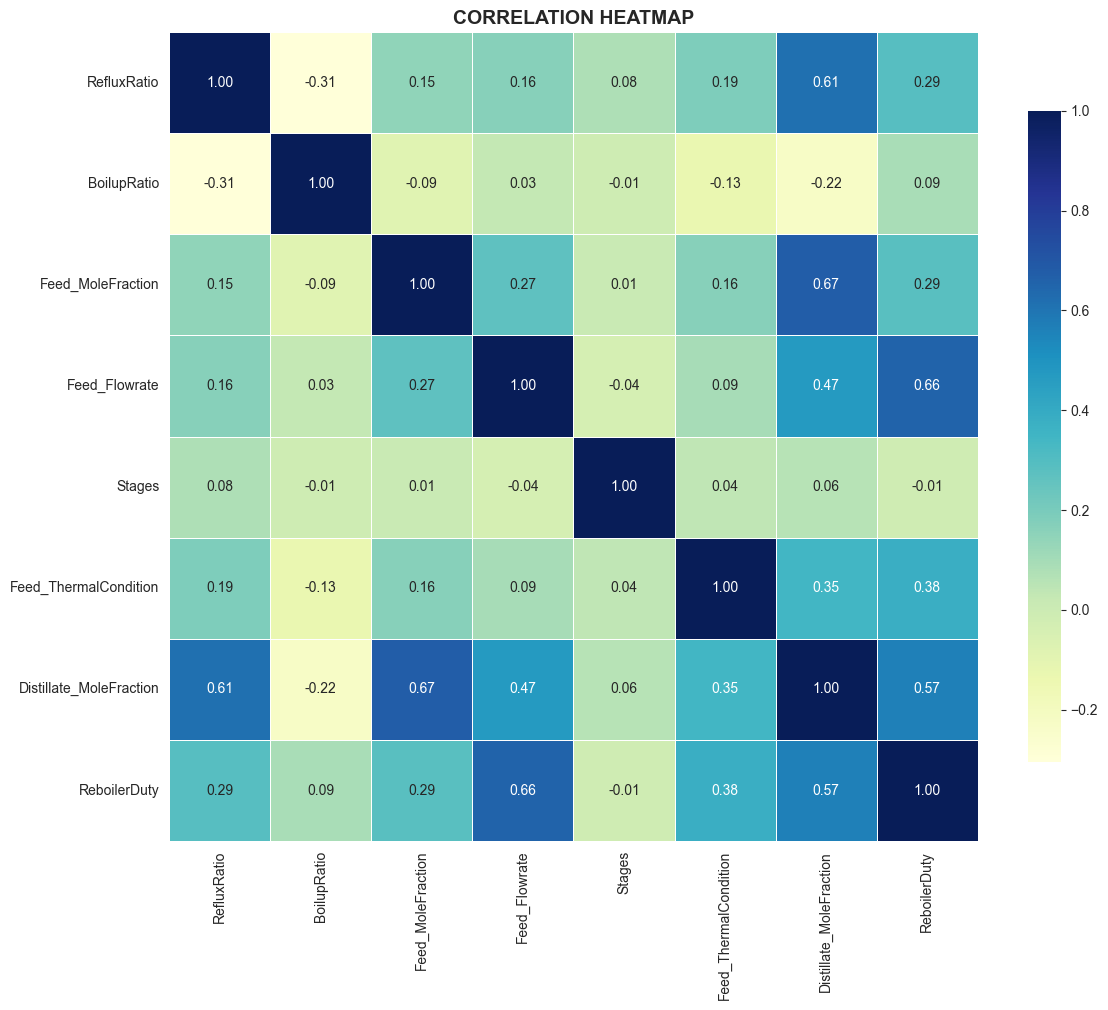

In [526]:
# Compute correlation matrix
corr_matrix = df[variables].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5)

plt.title('CORRELATION HEATMAP', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


INSIGHTS:

DISTILLATE MOLE FRACTION

1. Strongest positive correlations:
- Feed Mole Fraction (0.67)
- Reflux Ratio (0.61)
- Feed Flowrate (0.47)
- Feed Thermal Condition (0.35) - moderate

2. Weak or No correlation:
- Number of Stages (0.06)
- Boilup Ratio (-0.22) - slightly negative correlation.

REBOILER DUTY

1. Strongest positive correlations:
- Feed Flowrate (0.66) - biggest factor for energy consumption.
- Distillate Mole Fraction (0.57) - higher purity needs more energy.

2. Moderate correlations:
- Feed Thermal Condition (0.38) - duty increases when feed is preheated or saturated.
- Feed Mole Fraction (0.29)
- Reflux Ratio (0.29) 

3. Weak or No correlation:
- Stages (-0.01) 
- Boilup Ratio (0.09)